In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/ashua/Desktop/Stock Market Recommendation System/data/AAPL_10y.csv', parse_dates=["Date"])
df.set_index("Date", inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2514 entries, 2015-12-28 00:00:00-05:00 to 2025-12-24 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2514 non-null   float64
 1   High          2514 non-null   float64
 2   Low           2514 non-null   float64
 3   Close         2514 non-null   float64
 4   Volume        2514 non-null   int64  
 5   Dividends     2514 non-null   float64
 6   Stock Splits  2514 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.1+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03,2514.000000,2514.000000
mean,113.786300,115.026566,112.648909,113.895617,1.019359e+08,0.003258,0.001591
std,73.089919,73.861982,72.388024,73.164040,5.790583e+07,0.026075,0.079777
min,20.526531,20.907412,20.405656,20.604078,1.791060e+07,0.000000,0.000000
25%,41.468416,41.742845,41.071360,41.464256,6.199745e+07,0.000000,0.000000
50%,120.238047,121.495038,118.187964,119.852562,8.890555e+07,0.000000,0.000000
75%,171.232382,172.830131,169.625342,171.482712,1.244942e+08,0.000000,0.000000
max,286.200012,288.619995,283.299988,286.190002,5.334788e+08,0.260000,4.000000


In [5]:
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
# Daily returns
df["Return"] = df["Close"].pct_change()

# Moving averages
df["SMA_20"] = df["Close"].rolling(20).mean()
df["SMA_50"] = df["Close"].rolling(50).mean()

# Volatility
df["Volatility"] = df["Return"].rolling(20).std()

In [7]:
df.dropna(inplace=True)

In [8]:
sns.set(style="whitegrid")

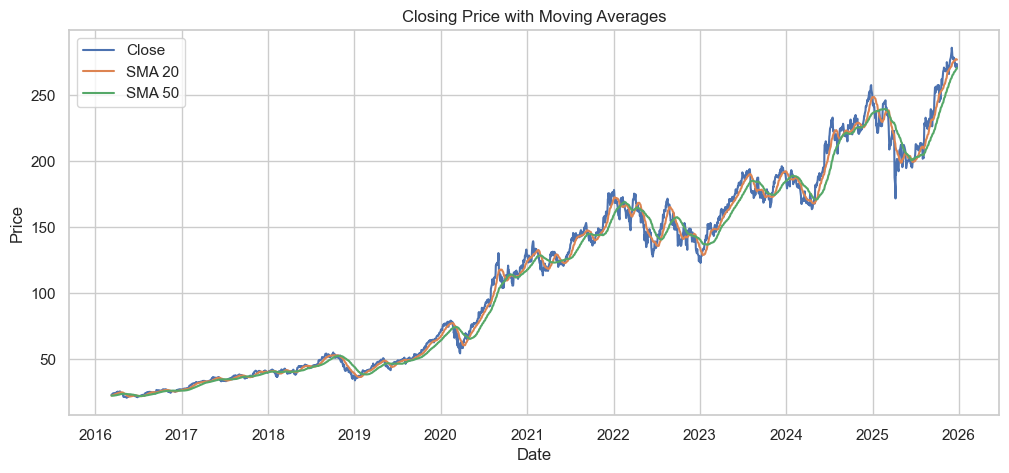

In [9]:
#Price with Moving Averages
plt.figure(figsize=(12, 5))

sns.lineplot(x=df.index, y=df["Close"], label="Close")
sns.lineplot(x=df.index, y=df["SMA_20"], label="SMA 20")
sns.lineplot(x=df.index, y=df["SMA_50"], label="SMA 50")

plt.title("Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

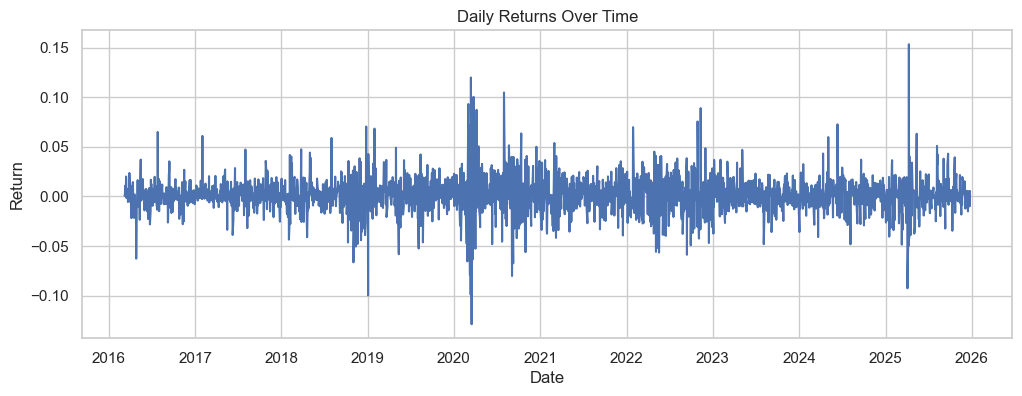

In [10]:
#Daily Returns Over Time
plt.figure(figsize=(12, 4))

sns.lineplot(x=df.index, y=df["Return"])

plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

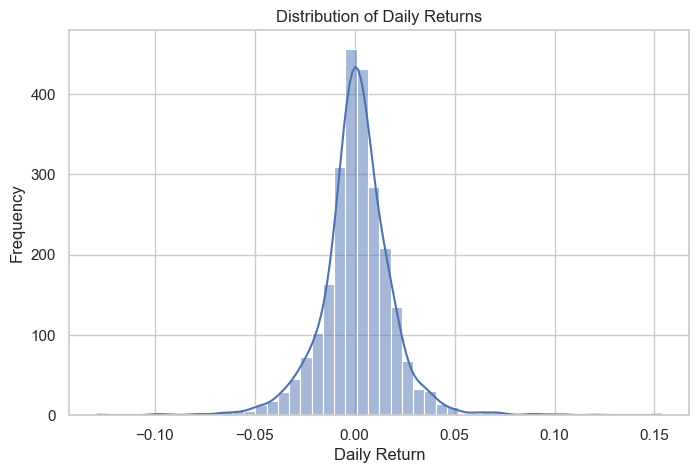

In [11]:
#Distribution of Daily Returns
plt.figure(figsize=(8, 5))

sns.histplot(df["Return"].dropna(), bins=50, kde=True)

plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

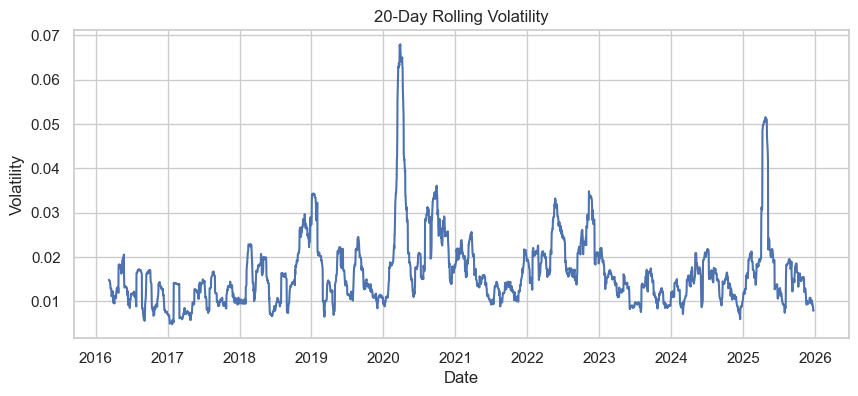

In [12]:
#Rolling Volatility
plt.figure(figsize=(10, 4))

sns.lineplot(x=df.index, y=df["Volatility"])

plt.title("20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

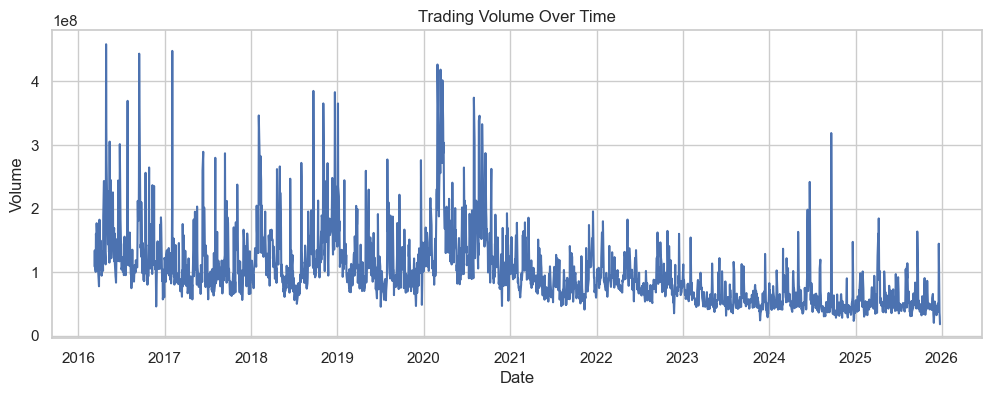

In [13]:
#Trading Volume Over Time
plt.figure(figsize=(12, 4))

sns.lineplot(x=df.index, y=df["Volume"])

plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [14]:
# Set index properly
df.index.name = "Date"

# Save EDA-processed data
df.to_csv("C:/Users/ashua/Desktop/Stock Market Recommendation System/data/AAPL_after_EDA.csv")

print("EDA data saved successfully")

EDA data saved successfully
